In [217]:
# !jt -t monokai -f roboto -fs 12 -dfs 13 -ofs 13 -cellw 100%
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib.rcParams['axes.facecolor']='black'
# matplotlib.rcParams['axes.edgecolor']='white'
# matplotlib.rcParams['xtick.color']='white'
# matplotlib.rcParams['ytick.color']='white'
# matplotlib.rcParams['axes.prop_cycle']=matplotlib.cycler(color=["yellow", "#e94cdc", "0.7"])
# matplotlib.rcParams['axes.linewidth']=1.3
# matplotlib.rcParams['text.color']='yellow'
import warnings
warnings.filterwarnings('ignore')

In [218]:
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (8, 8)

In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
dat = pd.read_csv('/Users/anton.andreytsev/Downloads/Fatalities.csv')

In [6]:
dat.head()

,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
0,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.00,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
1,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,19.00,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
2,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,19.00,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
3,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,19.67,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
4,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,21.00,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


state factor indicating state.
year factor indicating year.
spirits numeric. Spirits consumption.
unemp numeric. Unemployment rate.
income numeric. Per capita personal income in 1987 dollars.
emppop numeric. Employment/population ratio.
beertax numeric. Tax on case of beer.
baptist numeric. Percent of southern baptist.
mormon numeric. Percent of mormon.
drinkage numeric. Minimum legal drinking age.
dry numeric. Percent residing in “dry” countries.
youngdrivers numeric. Percent of drivers aged 15–24.
miles numeric. Average miles per driver.
breath factor. Preliminary breath test law?
jail factor. Mandatory jail sentence?
service factor. Mandatory community service?
fatal numeric. Number of vehicle fatalities.
nfatal numeric. Number of night-time vehicle fatalities.
sfatal numeric. Number of single vehicle fatalities.
fatal1517 numeric. Number of vehicle fatalities, 15–17 year olds.
nfatal1517 numeric. Number of night-time vehicle fatalities, 15–17 year olds.
fatal1820 numeric. Number of vehicle fatalities, 18–20 year olds.
nfatal1820 numeric. Number of night-time vehicle fatalities, 18–20 year olds.
fatal2124 numeric. Number of vehicle fatalities, 21–24 year olds.
nfatal2124 numeric. Number of night-time vehicle fatalities, 21–24 year olds.
afatal numeric. Number of alcohol-involved vehicle fatalities.
pop numeric. Population.
pop1517 numeric. Population, 15–17 year olds.
pop1820 numeric. Population, 18–20 year olds.
pop2124 numeric. Population, 21–24 year olds.
milestot numeric. Total vehicle miles (millions).
unempus numeric. US unemployment rate.
emppopus numeric. US employment/population ratio.
gsp numeric. GSP rate of change

In [100]:
dat['fatality_rate'] = dat.fatal/10000

In [101]:
# Все переменные числовые, кроме: state, breath (бинарная), jail (бинарная),service (бинарная)   
dat.dtypes

state             object
year               int64
spirits          float64
unemp            float64
income           float64
emppop           float64
beertax          float64
baptist          float64
mormon           float64
drinkage         float64
dry              float64
youngdrivers     float64
miles            float64
breath            object
jail              object
service           object
fatal              int64
nfatal             int64
sfatal             int64
fatal1517          int64
nfatal1517         int64
fatal1820          int64
nfatal1820         int64
fatal2124          int64
nfatal2124         int64
afatal           float64
pop              float64
pop1517          float64
pop1820          float64
pop2124          float64
milestot         float64
unempus          float64
emppopus         float64
gsp              float64
fatality_rate    float64
dtype: object

In [103]:
dat.describe()

,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,dry,...,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp,fatality_rate
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,...,336.000000,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,336.000000,336.000000,336.000000,336.000000,336.000000
mean,1985.000000,1.753690,7.346726,13880.184533,60.805676,0.513256,7.156925,2.801933,20.455625,4.267074,...,293.333247,4.930272e+06,2.308155e+05,2.490904e+05,3.363899e+05,37101.491151,7.528571,59.971430,0.025313,0.092866
std,2.002983,0.683575,2.533405,2253.046291,4.721656,0.477844,9.762621,9.665279,0.899025,9.500901,...,303.580749,5.073704e+06,2.298963e+05,2.493456e+05,3.453044e+05,37454.365758,1.479376,1.585048,0.043173,0.093405
min,1982.000000,0.790000,2.400000,9513.761719,42.993198,0.043311,0.000000,0.100000,18.000000,0.000000,...,24.600000,4.789997e+05,2.100002e+04,2.099996e+04,3.000016e+04,3993.000000,5.500000,57.799999,-0.123641,0.007900
25%,1983.000000,1.300000,5.475000,12085.849854,57.691426,0.208849,0.626752,0.272160,20.000000,0.000000,...,90.497749,1.545251e+06,7.174993e+04,7.696212e+04,1.035000e+05,11691.500244,6.200000,57.900002,0.001182,0.029375
50%,1985.000000,1.670000,7.000000,13763.128906,61.364660,0.352589,1.749250,0.393111,21.000000,0.086812,...,211.594002,3.310503e+06,1.630002e+05,1.709823e+05,2.409999e+05,28483.500000,7.200000,60.100002,0.032413,0.070100
75%,1987.000000,2.012500,8.900000,15175.124268,64.412504,0.651573,13.127125,0.629320,21.000000,2.424810,...,363.957748,5.751735e+06,2.705002e+05,3.083114e+05,4.130001e+05,44139.750000,9.600000,61.500000,0.056501,0.106350
max,1988.000000,4.900000,18.000000,22193.455078,71.268654,2.720764,30.355700,65.916496,21.000000,45.792099,...,2094.899902,2.831403e+07,1.172000e+06,1.321004e+06,1.892998e+06,241575.015625,9.700000,62.300003,0.142361,0.550400


In [104]:
# Корреляционная матрица
dat.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,dry,youngdrivers,miles,fatal,nfatal,sfatal,fatal1517,nfatal1517,fatal1820,nfatal1820,fatal2124,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp,fatality_rate
year,1.0,-0.18,-0.5,0.29,0.31,-0.037,-0.005,-0.0033,0.39,-0.0059,-0.61,0.29,0.03,-0.031,-0.018,0.058,-0.0012,-0.025,-0.098,-0.021,-0.056,-0.044,0.019,-0.02,-0.036,-0.042,0.077,-0.96,0.99,0.25,0.03
spirits,-0.18,1.0,-0.24,0.45,0.41,-0.089,-0.29,-0.18,-0.084,-0.27,-0.059,-0.056,-0.093,-0.086,-0.1,-0.15,-0.1,-0.1,-0.095,-0.075,-0.071,-0.14,-0.065,-0.072,-0.067,-0.058,-0.088,0.17,-0.18,0.27,-0.093
unemp,-0.5,-0.24,1.0,-0.55,-0.8,0.057,0.26,-0.0078,-0.26,0.26,0.39,-0.28,0.088,0.13,0.12,0.11,0.1,0.13,0.16,0.097,0.11,0.16,0.08,0.12,0.12,0.11,0.039,0.53,-0.52,-0.43,0.088
income,0.29,0.45,-0.55,1.0,0.52,-0.4,-0.47,-0.22,0.2,-0.34,-0.48,-0.08,0.24,0.25,0.25,0.22,0.21,0.23,0.22,0.24,0.27,0.12,0.37,0.34,0.34,0.34,0.35,-0.28,0.29,0.39,0.24
emppop,0.31,0.41,-0.8,0.52,1.0,-0.16,-0.36,0.11,0.16,-0.34,-0.21,0.32,-0.18,-0.18,-0.18,-0.19,-0.15,-0.18,-0.19,-0.16,-0.17,-0.2,-0.17,-0.19,-0.18,-0.17,-0.1,-0.32,0.32,0.22,-0.18
beertax,-0.037,-0.089,0.057,-0.4,-0.16,1.0,0.63,0.0052,-0.06,0.18,0.25,0.14,0.05,-0.00093,0.0012,0.083,0.022,0.011,-0.024,0.015,-0.034,0.085,-0.088,-0.074,-0.07,-0.078,-0.033,0.034,-0.036,0.11,0.05
baptist,-0.005,-0.29,0.26,-0.47,-0.36,0.63,1.0,-0.15,0.056,0.57,0.17,0.14,0.16,0.12,0.12,0.19,0.15,0.15,0.11,0.14,0.078,0.23,0.00063,0.019,0.022,0.014,0.066,0.0049,-0.005,-0.025,0.16
mormon,-0.0033,-0.18,-0.0078,-0.22,0.11,0.0052,-0.15,1.0,0.0097,-0.091,0.21,0.00044,-0.15,-0.17,-0.17,-0.16,-0.15,-0.16,-0.17,-0.15,-0.18,-0.16,-0.16,-0.17,-0.16,-0.15,-0.16,0.0032,-0.0032,-0.053,-0.15
drinkage,0.39,-0.084,-0.26,0.2,0.16,-0.06,0.056,0.0097,1.0,0.14,-0.28,0.059,0.046,0.0082,0.023,0.069,0.024,0.0053,-0.055,0.03,0.014,-0.013,0.066,0.048,0.047,0.043,0.088,-0.36,0.38,0.2,0.046
dry,-0.0059,-0.27,0.26,-0.34,-0.34,0.18,0.57,-0.091,0.14,1.0,0.064,-0.083,0.071,0.045,0.064,0.12,0.041,0.072,0.05,0.063,0.046,0.13,0.026,0.044,0.042,0.032,0.028,0.0067,-0.0061,0.0076,0.071


Нас интересуте вопрос: как введение налога на алкоголь (beertax) влияет на смерность на дорогах

Text(0,0.5,'Кол-во смертей')

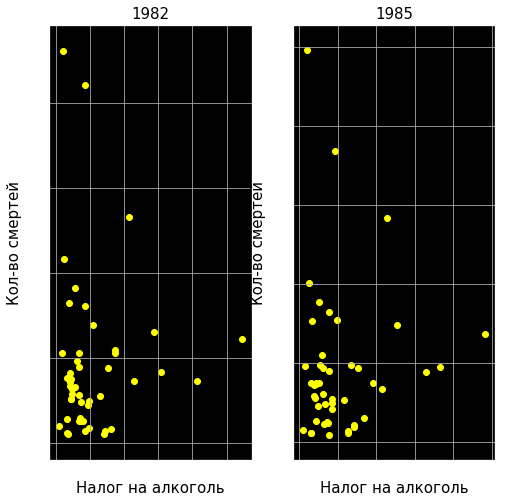

In [228]:
fig, ax = plt.subplots(ncols=2, nrows=1)
ax[0].scatter(dat.beertax[dat.year == 1982], dat.fatality_rate[dat.year == 1982])
ax[0].set_title('1982', fontsize=15, color='black')
ax[0].set_xlabel(u'Налог на алкоголь', fontsize=15)#, color='yellow')
ax[0].grid()
ax[0].set_ylabel(u'Кол-во смертей', fontsize=15)#, color='yellow');
ax[1].scatter(dat.beertax[dat.year == 1985], dat.fatality_rate[dat.year == 1985])
ax[1].set_title('1985', fontsize=15, color='black')
ax[1].set_xlabel(u'Налог на алкоголь', fontsize=15)#, color='yellow')
ax[1].grid()
ax[1].set_ylabel(u'Кол-во смертей', fontsize=15)#, color='yellow');

В целом, взаимосвязь положительная (на глаз) и это странно, кроме того подозреваем, что в данных присутствует гетероскедастичность.

In [162]:
model_1982 = smf.wls('fatality_rate ~ beertax', data=dat.ix[dat.year == 1982]).fit(cov_type='HC0')
model_1985 = smf.wls('fatality_rate ~ beertax', data=dat.ix[dat.year == 1985]).fit(cov_type='HC0')
print(model_1982.summary())
print(model_1985.summary())

                            WLS Regression Results                            
Dep. Variable:          fatality_rate   R-squared:                       0.001
Model:                            WLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.08326
Date:                Wed, 13 Feb 2019   Prob (F-statistic):              0.774
Time:                        11:40:49   Log-Likelihood:                 46.806
No. Observations:                  48   AIC:                            -89.61
Df Residuals:                      46   BIC:                            -85.87
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0883      0.020      4.512      0.0

В обоих случаях, принимается гипотеза о том, налог на алкоголь не оказывает влияние на смертность на дорогах

In [166]:
# !pip install linearmodels
# https://github.com/bashtage/linearmodels/blob/master/examples/panel_examples.ipynb

In [207]:
from linearmodels import PanelOLS, RandomEffects, BetweenOLS, PooledOLS

In [208]:
panel_dat = dat.set_index(['state', 'year'])
panel_dat.head(10)

spirits  unemp        income     emppop   beertax    baptist  \
state year                                                                 
al    1982     1.37   14.4  10544.152344  50.692039  1.539379  30.355700   
      1983     1.36   13.7  10732.797852  52.147030  1.788991  30.333599   
      1984     1.32   11.1  11108.791016  54.168087  1.714286  30.311501   
      1985     1.28    8.9  11332.626953  55.271137  1.652542  30.289499   
      1986     1.23    9.8  11661.506836  56.514496  1.609907  30.267401   
      1987     1.18    7.8  11944.000000  57.509880  1.560000  30.245300   
      1988     1.17    7.2  12368.624023  56.834530  1.501444  30.223301   
az    1982     1.97    9.9  12309.069336  56.893295  0.214797   3.958900   
      1983     1.90    9.1  12693.807617  57.553631  0.206422   3.890100   
      1984     2.14    5.0  13265.933594  60.379021  0.296703   3.822600   

             mormon  drinkage        dry  youngdrivers      ...        \
state year                                                  ...         
al    1982  0.32829     19.00  25.006300      0.211572      ...         
      1983  0.34341     19.00  22.994200      0.210768      ...         
      1984  0.35924     19.00  24.042601      0.211484      ...         
      1985  0.37579     19.67  23.633900      0.211140      ...         
      1986  0.39311     21.00  23.464701      0.213400      ...         
      1987  0.41123     21.00  23.792400      0.215527      ...         
      1988  0.43018     21.00  23.792400      0.218328      ...         
az    1982  4.91910     19.00   0.000000      0.209012      ...         
      1983  4.83107     19.00   0.000000      0.203855      ...         
      1984  4.74461     19.00   0.000000      0.209127      ...         

                afatal         pop        pop1517        pop1820  \
state year                                                         
al    1982  309.437988  3942002.25  208999.593750  221553.437500   
      1983  341.834015  3960008.00  202000.078125  219125.468750   
      1984  304.872009  3988991.75  196999.968750  216724.093750   
      1985  276.742004  4021007.75  194999.734375  214349.031250   
      1986  360.716003  4049993.75  203999.890625  212000.000000   
      1987  368.420990  4082999.00  204999.812500  208998.453125   
      1988  298.321991  4101992.25  201000.125000  193000.515625   
az    1982  173.667999  2896996.50  140999.984375  156378.703125   
      1983  196.889999  2977004.25  138999.890625  157521.437500   
      1984  212.360992  3071995.75  138000.078125  158672.531250   

                  pop2124  milestot  unempus   emppopus       gsp  \
state year                                                          
al    1982  290000.062500   28516.0      9.7  57.799999 -0.022125   
      1983  290000.156250   31032.0      9.6  57.900002  0.046558   
      1984  288000.156250   32961.0      7.5  59.500004  0.062798   
      1985  284000.312500   35091.0      7.2  60.100002  0.027490   
      1986  263000.281250   36259.0      7.0  60.700001  0.032143   
      1987  258999.765625   37426.0      6.2  61.500000  0.048976   
      1988  262999.781250   39684.0      5.5  62.300003  0.035392   
az    1982  217999.984375   19729.0      9.7  57.799999 -0.043182   
      1983  218999.890625   19611.0      9.6  57.900002  0.076206   
      1984  219999.968750   20613.0      7.5  59.500004  0.106214   

            fatality_rate  
state year                 
al    1982         0.0839  
      1983         0.0930  
      1984         0.0932  
      1985         0.0882  
      1986         0.1081  
      1987         0.1110  
      1988         0.1023  
az    1982         0.0724  
      1983         0.0675  
      1984         0.0869  

[10 rows x 33 columns]

In [209]:
model_pooled = PooledOLS.from_formula('fatality_rate ~ 1 + beertax', data=panel_dat).fit()
print(model_pooled)

                          PooledOLS Estimation Summary                          
Dep. Variable:          fatality_rate   R-squared:                        0.0025
Estimator:                  PooledOLS   R-squared (Between):              0.0029
No. Observations:                 336   R-squared (Within):              -0.0348
Date:                Wed, Feb 13 2019   R-squared (Overall):              0.0025
Time:                        12:11:52   Log-likelihood                    320.75
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.8422
Entities:                          48   P-value                           0.3594
Avg Obs:                       7.0000   Distribution:                   F(1,334)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             0.8422
                            

In [210]:
model_FE = PanelOLS.from_formula('fatality_rate ~ 1 + beertax + EntityEffects', data=panel_dat).fit()
print(model_FE)

                          PanelOLS Estimation Summary                           
Dep. Variable:          fatality_rate   R-squared:                        0.0759
Estimator:                   PanelOLS   R-squared (Between):             -0.0840
No. Observations:                 336   R-squared (Within):               0.0759
Date:                Wed, Feb 13 2019   R-squared (Overall):             -0.0824
Time:                        12:11:53   Log-likelihood                    1103.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.569
Entities:                          48   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                   F(1,287)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             23.569
                            

In [211]:
model_FE_time = PanelOLS.from_formula('fatality_rate ~ 1 + beertax + EntityEffects + TimeEffects', data=panel_dat).fit()
print(model_FE_time)

                          PanelOLS Estimation Summary                           
Dep. Variable:          fatality_rate   R-squared:                        0.0372
Estimator:                   PanelOLS   R-squared (Between):             -0.0465
No. Observations:                 336   R-squared (Within):               0.0690
Date:                Wed, Feb 13 2019   R-squared (Overall):             -0.0454
Time:                        12:11:54   Log-likelihood                    1117.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      10.869
Entities:                          48   P-value                           0.0011
Avg Obs:                       7.0000   Distribution:                   F(1,281)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             10.869
                            

In [212]:
model_RE = RandomEffects.from_formula('fatality_rate ~ 1 + beertax + EntityEffects', data=panel_dat).fit()
print(model_RE)

                        RandomEffects Estimation Summary                        
Dep. Variable:          fatality_rate   R-squared:                        0.0564
Estimator:              RandomEffects   R-squared (Between):             -0.0672
No. Observations:                 336   R-squared (Within):               0.0747
Date:                Wed, Feb 13 2019   R-squared (Overall):             -0.0657
Time:                        12:11:54   Log-likelihood                    1076.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.946
Entities:                          48   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                   F(1,334)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             19.946
                            

In [213]:
model_RE_time = RandomEffects.from_formula('fatality_rate ~ 1 + beertax + EntityEffects + TimeEffects', data=panel_dat).fit()
print(model_RE_time)

                        RandomEffects Estimation Summary                        
Dep. Variable:          fatality_rate   R-squared:                        0.0564
Estimator:              RandomEffects   R-squared (Between):             -0.0672
No. Observations:                 336   R-squared (Within):               0.0747
Date:                Wed, Feb 13 2019   R-squared (Overall):             -0.0657
Time:                        12:11:55   Log-likelihood                    1076.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.946
Entities:                          48   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                   F(1,334)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             19.946
                            

In [214]:
from linearmodels.panel import compare
print(compare({'FE': model_FE,'RE': model_RE,'Pooled': model_pooled, 'FE_time': model_FE_time,'RE_time': model_RE_time}))

                                                 Model Comparison                                                
                                       FE           FE_time            Pooled                RE           RE_time
-----------------------------------------------------------------------------------------------------------------
Dep. Variable               fatality_rate     fatality_rate     fatality_rate     fatality_rate     fatality_rate
Estimator                        PanelOLS          PanelOLS         PooledOLS     RandomEffects     RandomEffects
No. Observations                      336               336               336               336               336
Cov. Est.                      Unadjusted        Unadjusted        Unadjusted        Unadjusted        Unadjusted
R-squared                          0.0759            0.0372            0.0025            0.0564            0.0564
R-Squared (Within)                 0.0759            0.0690           -0.0348           